In [91]:
import numpy as np
from PIL import Image
from matplotlib.pyplot import imshow
%matplotlib inline
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow import keras
from tensorflow.keras.layers import Activation, Dense
print (keras.__version__)
from sklearn.preprocessing import MinMaxScaler

2.6.0


In [92]:
# Pour commencer nous importons l'ensemble de données MNIST à partir de la bibliothèque Keras.


from keras.datasets import mnist

In [93]:
# Nous importons des données dans des variables.

(x_train, y_train), (x_test, y_test) = mnist.load_data()


In [94]:
# Dimension des caractéristiques : 60000 images de taille 28 x 28 pixels


print (x_train.shape)

# Nombre d'étiquettes ou labels

print (y_train.shape)


(60000, 28, 28)
(60000,)


In [95]:
# Vérifions les 10 premières étiquettes: Ils désignent les 10 premiers chiffres 

print('label',y_train[0:10])


label [5 0 4 1 9 2 1 3 1 4]


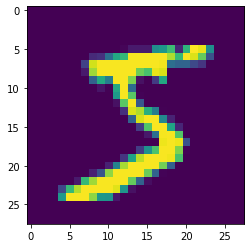

In [96]:
# Affichage d'une image des données d 'entrainement
# qui correspond bien à la premiere image

image=x_train[0]
imshow(image)

In [97]:
# Nous allons choisir arbitrairement 2 catégories de chiffres pour déveloper un modele d'apprentissage
# capable de les identifiers.
# Cela correspond à effectuer une classification binaire.
# Choissisons par exemple tous les 5 et tous les 6.
# mais vous pouvez choisir n'importe quelle paire de chiffres.


# Le code ci-dessous isolent tous les 5 et 6 et les stock dans deux nouvelles variables 

x_train_new, y_train_new = x_train[(y_train==5) | (y_train==6)], y_train[(y_train==5) | (y_train==6)]


In [98]:
# Affichons les labels associés aux caractéristiques ou images

print('labels',y_train_new[0:10])

# Affichons le nombre et la taille des nouvelles images
print('caracteristiques',x_train_new.shape)

# Affichons le nombre de labels associés.
print('nombre de labels associés',y_train_new.shape)

# Affichage des 10 premiers labels:
print('10 premiers labels',y_train_new[0:10])

labels [5 5 6 6 6 5 6 6 5 6]
caracteristiques (11339, 28, 28)
nombre de labels associés (11339,)
10 premiers labels [5 5 6 6 6 5 6 6 5 6]


In [99]:
# Prétraitement des données. Résolution 28,28 pixels à convertir(28x28=784) avec .reshape()
print('Affichage avant traitement:',x_train_new.shape)
x_train_final = x_train_new.reshape(-1,784)
print('Affichage apres traitement:',x_train_final.shape) 

Affichage avant traitement: (11339, 28, 28)
Affichage apres traitement: (11339, 784)


In [100]:
# Meme opérations pour les données de test

x_test_new, y_test_new = x_test[(y_test==5) | (y_test==6)], y_test[(y_test==5) | (y_test==6)]
print (x_test_new.shape)
print (y_test_new.shape)
print (y_test_new[0:10])

(1850, 28, 28)
(1850,)
[5 6 5 6 6 5 5 6 5 5]


In [101]:
print('avant:',x_test_new.shape)
x_test_final = x_test_new.reshape(-1,784)
print('apres',x_test_final.shape)


avant: (1850, 28, 28)
apres (1850, 784)


In [102]:
# Normalisation des données d'entrainement et de test

x_train_final = x_train_final.astype("float32") / 255
x_test_final = x_test_final.astype("float32") / 255

In [103]:
print('affichage du tableau:',x_train_final)

affichage du tableau: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [104]:
# Normalisation avec 'from sklearn.preprocessing import MinMaxScaler'
# pour les données d'entrainement 

scaler = MinMaxScaler(feature_range=(0,1))
scaled_y_train_new = scaler.fit_transform(y_train_new.reshape(-1,1))


In [105]:
# Normalisation avec 'from sklearn.preprocessing import MinMaxScaler'
# pour les données d'entrainement 

scaler = MinMaxScaler(feature_range=(0,1))
scaled_y_test_new = scaler.fit_transform(y_test_new.reshape(-1,1))


In [106]:
print('affichages des données de test normalisées:',scaled_y_test_new)

affichages des données de test normalisées: [[0.]
 [1.]
 [0.]
 ...
 [1.]
 [0.]
 [1.]]


In [107]:
print('Affichage des données d entrainement normalisées:',scaled_y_train_new)

Affichage des données d entrainement normalisées: [[0.]
 [0.]
 [1.]
 ...
 [0.]
 [0.]
 [1.]]


In [108]:
# Architecture du réseau de neurones

model = Sequential([
    Dense(units=16, input_shape=(784,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax')
])


In [109]:
# Compilation du modele

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [110]:
# Affichage des parametres

model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 16)                12560     
_________________________________________________________________
dense_4 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 66        
Total params: 13,170
Trainable params: 13,170
Non-trainable params: 0
_________________________________________________________________


In [111]:
# Formation du modele


model.fit(
  x=x_train_final,
  y=scaled_y_train_new,
  shuffle=True,
  epochs=1,
  batch_size=16
)

709/709 [==============================] - 2s 2ms/step - loss: 0.2456 - accuracy: 0.9321


In [114]:
# vérification sur un ensemble que l'algorithme n'a pas vu auparavant c'est l' ensemble de test:

#'x_test_final' et ses étiquettes 'scaled_y_test_new'


evaluation = model.evaluate(x=x_test_final, y=scaled_y_test_new)

58/58 [==============================] - 0s 1ms/step - loss: 0.0855 - accuracy: 0.9773


In [115]:
# 

evaluation


[0.08554725348949432, 0.977297306060791]

In [44]:
# Enregistrement du modele dans un fichier .hdf5

model.save(r'./logisticRegressionKeras.hdf5')

In [116]:
# Pour charger le modèle à l'aide de la fonction load_model ().

model = keras.models.load_model(r'./logisticRegressionKeras.hdf5')

In [117]:
predictions = model.predict(x=x_test_final,
                            batch_size=10,
                            verbose=0)  

In [118]:
y_test_new[0:10]

array([5, 6, 5, 6, 6, 5, 5, 6, 5, 5], dtype=uint8)

In [119]:
# Chaque élément represente une liste de longueur 2.
# La somme des deux valeurs de chaque liste est 1.
# les deux colonnes contiennent les probabilités pour chaque sortie possible
# La première colonne contient la probabilité du chiffre 5
# La deuxième colonne contient la probabilité du chiffre 6


for i in predictions:
        print(i)


[0.0207189  0.97928107]
[0.01093886 0.9890611 ]
[0.9989874  0.00101257]
[0.0205706  0.97942936]
[0.00810949 0.99189043]
[0.98618454 0.01381551]
[0.99724954 0.00275044]
[0.00541865 0.9945813 ]
[0.99591064 0.00408932]
[0.99115247 0.00884759]
[0.00410417 0.99589586]
[0.9666531  0.03334684]
[0.04143412 0.95856583]
[0.03830897 0.9616911 ]
[2.8299890e-04 9.9971694e-01]
[0.00130114 0.99869883]
[0.01262654 0.9873734 ]
[0.00667444 0.9933256 ]
[9.999895e-01 1.047264e-05]
[9.999677e-01 3.229020e-05]
[0.00245984 0.9975401 ]
[9.9967957e-01 3.2041219e-04]
[9.9978083e-01 2.1920096e-04]
[3.1779043e-04 9.9968219e-01]
[9.9407305e-05 9.9990058e-01]
[9.9963295e-01 3.6697066e-04]
[3.6602764e-04 9.9963391e-01]
[0.02067736 0.9793226 ]
[0.99876827 0.00123172]
[0.99808455 0.00191544]
[9.9913967e-01 8.6027454e-04]
[0.00290904 0.99709094]
[5.416876e-04 9.994584e-01]
[9.9999774e-01 2.2891395e-06]
[0.00141123 0.99858874]
[9.9972135e-01 2.7862962e-04]
[0.9811183  0.01888162]
[0.9959194  0.00408059]
[9.99923e-01 7.7

[0.01341455 0.9865855 ]
[0.6709051 0.3290949]
[9.9999917e-01 8.4613998e-07]
[9.9998856e-01 1.1422203e-05]
[9.9988949e-01 1.1050543e-04]
[9.9952686e-01 4.7316420e-04]
[0.15235375 0.84764624]
[0.00459432 0.9954057 ]
[8.8234735e-04 9.9911767e-01]
[0.9986701  0.00132988]
[9.9958783e-01 4.1218783e-04]
[0.8785362  0.12146384]
[9.9983394e-01 1.6600649e-04]
[9.9906951e-01 9.3050225e-04]
[0.01536945 0.9846305 ]
[0.97143745 0.02856252]
[0.9980715  0.00192853]
[9.9982554e-01 1.7453403e-04]
[9.9978167e-01 2.1830469e-04]
[0.99174374 0.00825621]
[0.93303156 0.06696838]
[0.9969317  0.00306827]
[0.9925929  0.00740716]
[0.00207664 0.9979234 ]
[0.99705863 0.00294139]
[0.9930454  0.00695456]
[0.00568979 0.99431026]
[0.0013161  0.99868387]
[9.997563e-01 2.436855e-04]
[0.96408194 0.03591808]
[9.9987721e-01 1.2277148e-04]
[9.9993134e-01 6.8651425e-05]
[9.9994373e-01 5.6275647e-05]
[0.9467112  0.05328883]
[0.15204115 0.84795886]
[9.9989009e-01 1.0993431e-04]
[9.9999833e-01 1.6312857e-06]
[0.00154192 0.998458

[0.00100943 0.9989906 ]
[0.9946578  0.00534211]
[8.2395464e-04 9.9917597e-01]
[1.1792123e-04 9.9988210e-01]
[0.9842158  0.01578424]
[0.9709925  0.02900746]
[0.0013895 0.9986105]
[5.7935627e-04 9.9942064e-01]
[0.00170733 0.9982926 ]
[0.00280113 0.9971988 ]
[9.999907e-01 9.284594e-06]
[2.0851199e-04 9.9979156e-01]
[0.9979498  0.00205021]
[0.99189067 0.0081093 ]
[0.99328595 0.006714  ]
[3.438290e-04 9.996562e-01]
[1.881724e-04 9.998118e-01]
[0.9975586  0.00244133]
[0.9937425  0.00625749]
[5.057744e-04 9.994942e-01]
[0.9982035  0.00179653]
[0.9928052  0.00719487]
[0.00871883 0.9912812 ]
[0.9598885  0.04011147]
[0.974718   0.02528201]
[9.9996269e-01 3.7311245e-05]
[6.2256894e-04 9.9937743e-01]
[0.00269775 0.9973022 ]
[0.00146581 0.9985342 ]
[0.97535956 0.0246405 ]
[0.9779935  0.02200647]
[0.9952264  0.00477361]
[0.9958762  0.00412374]
[3.0969593e-04 9.9969029e-01]
[6.6243944e-04 9.9933749e-01]
[9.9962628e-01 3.7365878e-04]
[1.1499729e-04 9.9988496e-01]
[1.4054014e-04 9.9985945e-01]
[9.03740

In [53]:
scaled_y_test_new.shape

(1850, 1)

In [120]:
# Matrice de confusion
# tres pratique


import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import itertools
from sklearn.metrics import confusion_matrix

rounded_predictions = np.argmax(predictions, axis=-1)
y_true=scaled_y_test_new
y_pred=rounded_predictions


cm = confusion_matrix(y_true, y_pred)

In [121]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    Cette fonction imprime et trace la matrice de confusion.
    La normalisation peut être appliquée en définissant `normalize=True`..
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, sans normalisation')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Vrai label')
    plt.xlabel('Prediction label')

In [122]:
cm_plot_labels = ['chiffre 5','chiffre 6']

Confusion matrix, sans normalisation
[[875  17]
 [ 16 942]]


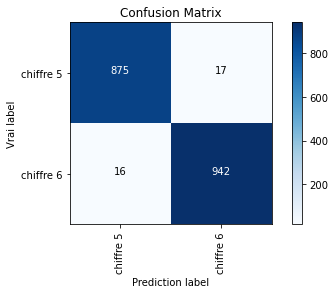

In [123]:
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [37]:
# la conversion utilisant la méthode convert('L') donne une échelle de gris inversée.
# C'est-à-dire qu'aux endroits où la valeur de la luminosité des pixels devrait être de 0
# nous avons 1 et vice versa.
# Par conséquent il faut soustraire 1 et multiplier par (-1).
# si il y a des "zéros négatifs" (valeurs indiquées par -0.).
# la fonction abs () a été utilisée. 
# vous pouvez répéter cette expérience en dessinant vos numéros par vous-même ou bien des captures d'ecran.
# Mais toujours les redimenssionner 28x28 avant.




def convert_image(file):
  image = np.array(Image.open(file).convert('L'))
  return np.abs((image / 255)) # - 1)*(-1))

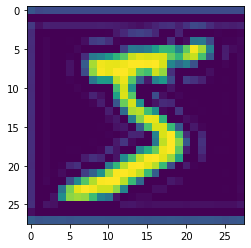

In [38]:
im = convert_image('cinque.png')
imshow(im)

In [39]:
predict_input = im.reshape((-1,784))
prediction = model.predict(predict_input)
prediction
# premiere colonne probabilité du chiffre 5
# deuxieme colonne probabilité du chiffre 6

array([[0.9469026 , 0.05309745]], dtype=float32)